<a href="https://colab.research.google.com/github/verochen147/COMP551/blob/master/cifar10_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline

In [0]:
import torch
import torchvision
import torchvision.transforms as transforms

The output of torchvision datasets are PILImage images of range [0, 1].
We transform them to Tensors of normalized range [-1, 1].



In [45]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=32,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


Let us show some of the training images, for fun.



IndexError: ignored

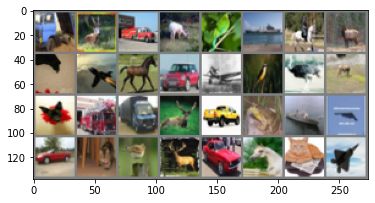

In [46]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(128)))

2. Define a Convolution Neural Network
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
Copy the neural network from the Neural Networks section before and modify it to
take 3-channel images (instead of 1-channel images as it was defined).



In [0]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

3. Define a Loss function and optimizer
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
Let's use a Classification Cross-Entropy loss and SGD with momentum.



In [0]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

4. Train the network
^^^^^^^^^^^^^^^^^^^^

This is when things start to get interesting.
We simply have to loop over our data iterator, and feed the inputs to the
network and optimize.



epoch [1] train_acc: 11.520 | test_acc: 17.970
epoch [2] train_acc: 26.620 | test_acc: 34.450
epoch [3] train_acc: 38.528 | test_acc: 42.640
epoch [4] train_acc: 44.768 | test_acc: 47.710
epoch [5] train_acc: 48.616 | test_acc: 48.710
epoch [6] train_acc: 51.332 | test_acc: 52.330
epoch [7] train_acc: 53.236 | test_acc: 54.380
epoch [8] train_acc: 55.598 | test_acc: 55.700
epoch [9] train_acc: 57.352 | test_acc: 57.860
epoch [10] train_acc: 59.028 | test_acc: 58.050
epoch [11] train_acc: 60.512 | test_acc: 58.640
epoch [12] train_acc: 61.914 | test_acc: 60.770
epoch [13] train_acc: 63.142 | test_acc: 62.120
epoch [14] train_acc: 64.168 | test_acc: 60.020
epoch [15] train_acc: 65.314 | test_acc: 62.140
epoch [16] train_acc: 66.234 | test_acc: 61.450
epoch [17] train_acc: 67.182 | test_acc: 63.500
epoch [18] train_acc: 68.246 | test_acc: 63.990
epoch [19] train_acc: 68.652 | test_acc: 63.210
epoch [20] train_acc: 70.002 | test_acc: 64.200
epoch [21] train_acc: 70.548 | test_acc: 64.240
e

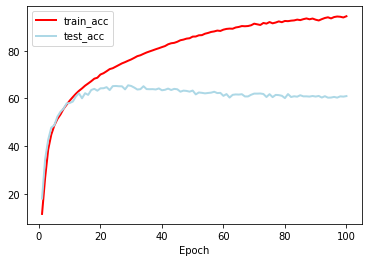

In [49]:
train_accuracy = []
test_accuracy = []

epochs = [int(x) for x in np.linspace(start=1, stop=100, num=100)]
for epoch in range(100):  # loop over the dataset multiple times
    
    # train

    train_loss = 0.0
    correct_train = 0
    total_train = 0
    acc_train = 0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        train_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    #loss_train = train_loss
    acc_train = 100.*correct_train/total_train
    
   
    
    train_accuracy.append(acc_train)


    #test 
    test_loss = 0
    correct_test = 0
    total_test = 0
    acc_test = 0

    with torch.no_grad():

      for data in testloader:
        images, labels = data
        outputs = net(images)
        loss = criterion(outputs, labels)
        test_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total_test += labels.size(0)
        correct_test += (predicted == labels).sum().item()
    
    #loss_test = test_loss
    acc_test = 100.*correct_test/total_test
    test_accuracy.append(acc_test)
    
    print('epoch [%d] train_acc: %.3f | test_acc: %.3f' %
                  (epoch + 1, acc_train, acc_test))
    


plt.plot(epochs, train_accuracy, color ='red', linewidth=2, label= 'train_acc')
plt.plot(epochs, test_accuracy, color = 'lightblue', linewidth=2, label='test_acc')
plt.legend()
plt.xlabel('Epoch')
plt.show()


          

